In [2]:
from cosmic_engine.cosmology.universe import Universe

import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science'])

## Cosmological Models

In [3]:
lcdm = Universe(H0=67.4, Omega_m=0.315, Omega_Lambda=0.685, Omega_rad=9.2e-5) # Concordance model, values from Planck
deSitter = Universe(Omega_m=1, Omega_Lambda=0, Omega_rad=0) # Matter-only universe
Rad_only = Universe(Omega_m=0, Omega_Lambda=0, Omega_rad=1) # Radiation-only universe
Milne = Universe(Omega_m=0, Omega_Lambda=0, Omega_rad=0) # Empty universe

### Hubble parameter vs redshift

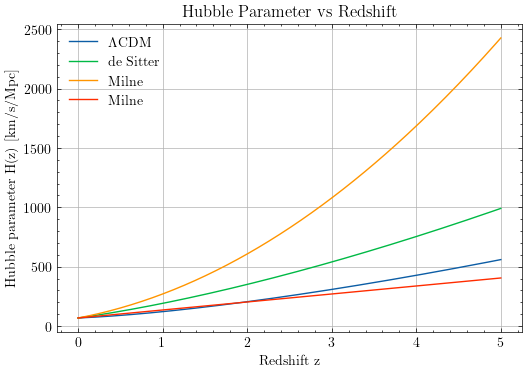

In [5]:
z_vals = np.linspace(0, 5, 200)  # From z=0 to z=1100

H_vals = [lcdm.H(z) for z in z_vals]
H_deSitter = [deSitter.H(z) for z in z_vals]
H_rad = [Rad_only.H(z) for z in z_vals]
H_milne = [Milne.H(z) for z in z_vals]
          
plt.figure(figsize=(6,4))
plt.plot(z_vals, H_vals, label=r'$\Lambda$CDM')
plt.plot(z_vals, H_deSitter, label='de Sitter')
plt.plot(z_vals, H_rad, label='Milne')
plt.plot(z_vals, H_milne, label='Milne')

plt.xlabel("Redshift z")
plt.ylabel("Hubble parameter H(z) [km/s/Mpc]")
plt.title("Hubble Parameter vs Redshift")

plt.grid(True)
plt.legend()
plt.show()

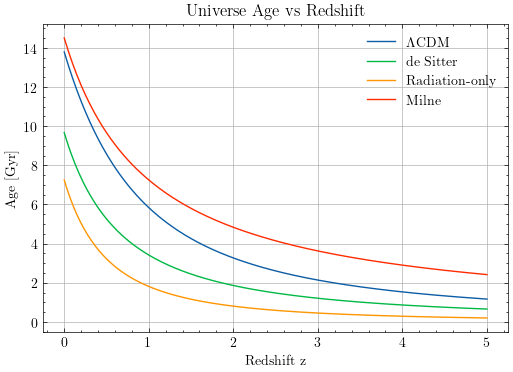

In [6]:
age_vals = [lcdm.time.age_of_universe(z) for z in z_vals]
age_deSitter = [deSitter.time.age_of_universe(z) for z in z_vals]
age_rad = [Rad_only.time.age_of_universe(z) for z in z_vals]
age_milne = [Milne.time.age_of_universe(z) for z in z_vals]

plt.figure(figsize=(6,4))
plt.plot(z_vals, age_vals, label=r'$\Lambda$CDM')
plt.plot(z_vals, age_deSitter, label='de Sitter')
plt.plot(z_vals, age_rad, label='Radiation-only')
plt.plot(z_vals, age_milne, label='Milne')

plt.xlabel("Redshift z")
plt.ylabel("Age [Gyr]")
plt.title("Universe Age vs Redshift")
plt.grid(True)
plt.legend()
plt.show()

### Temperature

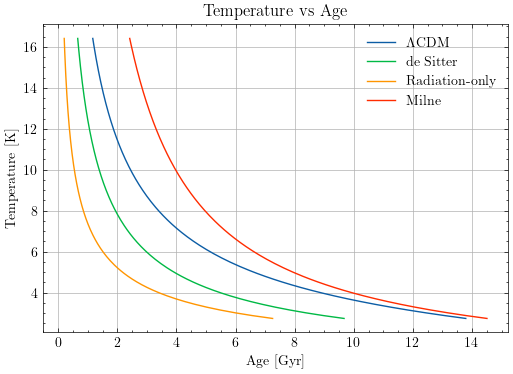

In [9]:
T_0 = 2.735 #K
T = lambda z: T_0 * (1 + z)

plt.figure(figsize=(6,4))
plt.plot(age_vals, T(z_vals), label=r'$\Lambda$CDM')
plt.plot(age_deSitter, T(z_vals), label='de Sitter')
plt.plot(age_rad, T(z_vals), label='Radiation-only')
plt.plot(age_milne, T(z_vals), label='Milne')

plt.xlabel("Age [Gyr]")
plt.ylabel("Temperature [K]")
plt.title("Temperature vs Age")
plt.grid(True)
plt.legend()
plt.show()